# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon.lexicon_memoris import lexicon_memoris, lithology_memoris, pollutant_memoris
from utils.io import boreholes_from_files, gdf_viewer
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base 
import random
from os import remove
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)


## Reading of CSV files in a dir

In [2]:
#df = pd.read_csv('test_data_boreholes.csv', sep=',') # use english lexicon
df = pd.read_csv('test_litho_fr.csv', sep=',') # use french lexicon

## Data Checking

In [3]:
#pol = ['As', 'Ni', 'Cl', 'Hg', 'Pb', 'Zn']
pol = ['VR','VS','VI']
#df[['Pollutant', 'Concentration']] = ''
df[['Pollutant', 'Concentration']] = ''
df['Pollutant'] = df['Pollutant'].apply(lambda x: random.sample(pol, 1)[0])
df['Concentration'] = df['Concentration'].apply(lambda x: np.random.randint(0,100))
df['Unit'] = 'mg/l'

In [4]:
df['Lithology'] = df['Lithology'].replace({'Grès':'Marne', 'Calcaire':'Dolomie'})

In [5]:
df.loc[35.5, :] = ['BH007',152794.0, 121111.0, 60.0, 0.57, 45, 'Calcaire', 'Bleu', 4, 41, 45, 'Cl', 78, 'mg/l']
df.loc[25.5, :] = ['BH005',152473.0, 121460.0, 72.0, 0.61, 32, 'Schiste', 'gris', 3, 29, 32, 'Cl', 78, 'mg/l']
df.drop(index=4, inplace=True)
df.drop(columns='Colour', inplace=True)
df = df.sort_index().reset_index(drop=True)

In [6]:
gdf_viewer(df)

Rows : 996, columns : 13


interactive(children=(IntSlider(value=10, description='rows', max=996, min=10, readout=False), IntSlider(value…

## Create Boreholes from dataframes or files

In [7]:
bhs_df=[df[0:50]] # list of dataframes

In [8]:
boreholes, components, link_intv_comp = boreholes_from_files(bhs_df, verbose=False,
                                                litho_field=['Lithology', 'Pollutant'], 
                                                color_field='Colour', lexicon=lexicon_memoris, 
                                                diam_field='Diameter', thick_field='Thickness')

/home/yanathan/Projects/GSDMA/utils/io.py:469: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   The 'overlaps' parameter may be used to remove this warning.
  boreholes.append(BoreholeOrm(id=bh_name))
/home/yanathan/Projects/GSDMA/utils/io.py:469: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.int_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Intervals.id to


Dataframe 0 processing...
|__ID:'BH001'
{'lithology': 'sable', 'pollutant': 'vs'}
{'lithology': 'argile', 'pollutant': 'vs'}
{'lithology': 'marne', 'pollutant': 'vi'}
{'lithology': 'charbon', 'pollutant': 'vs'}
Summary : [Striplog(4 Intervals, start=0.0, stop=28.0)]
|__ID:'BH002'
{'lithology': 'sable', 'pollutant': 'vr'}
{'lithology': 'argile', 'pollutant': 'vr'}
{'lithology': 'marne', 'pollutant': 'vi'}
{'lithology': 'charbon', 'pollutant': 'vi'}
{'lithology': 'dolomie', 'pollutant': 'vs'}
Summary : [Striplog(5 Intervals, start=0.0, stop=37.0)]
|__ID:'BH003'
{'lithology': 'sable', 'pollutant': 'vr'}
{'lithology': 'argile', 'pollutant': 'vi'}
{'lithology': 'marne', 'pollutant': 'vi'}
{'lithology': 'charbon', 'pollutant': 'vs'}
{'lithology': 'dolomie', 'pollutant': 'vr'}
Summary : [Striplog(5 Intervals, start=0.0, stop=18.0)]
|__ID:'BH004'
{'lithology': 'sable', 'pollutant': 'vi'}
{'lithology': 'argile', 'pollutant': 'vi'}
{'lithology': 'marne', 'pollutant': 'vr'}
{'lithology': 'charbo

In [9]:
boreholes

[<core.orm.BoreholeOrm>(Name=BH001, Length=28.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=32.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=45.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=14.0, Diameter=0.31, Intervals=4)]

In [10]:
components

{0: Component({'lithology': 'marne', 'pollutant': 'vi'}),
 1: Component({'lithology': 'charbon', 'pollutant': 'vs'}),
 2: Component({'lithology': 'argile', 'pollutant': 'vs'}),
 3: Component({'lithology': 'sable', 'pollutant': 'vs'}),
 4: Component({'lithology': 'dolomie', 'pollutant': 'vs'}),
 5: Component({'lithology': 'sable', 'pollutant': 'vr'}),
 6: Component({'lithology': 'argile', 'pollutant': 'vr'}),
 7: Component({'lithology': 'charbon', 'pollutant': 'vi'}),
 8: Component({'lithology': 'dolomie', 'pollutant': 'vr'}),
 9: Component({'lithology': 'argile', 'pollutant': 'vi'}),
 10: Component({'lithology': 'marne', 'pollutant': 'vr'}),
 11: Component({'lithology': 'sable', 'pollutant': 'vi'}),
 12: Component({'lithology': 'charbon', 'pollutant': 'vr'}),
 13: Component({'lithology': 'marne', 'pollutant': 'vs'}),
 14: Component({'lithology': 'schiste'}),
 15: Component({'lithology': 'dolomie', 'pollutant': 'vi'}),
 16: Component({'lithology': 'calcaire'})}

In [11]:
len(boreholes), len(components)

(10, 17)

## Create a project and save data in a database

In [12]:
remove('tmp_files/tfe_orm_db.db')

In [13]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [14]:
Base.metadata.create_all(engine)

2021-07-03 04:57:13,799 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-03 04:57:13,800 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-07-03 04:57:13,801 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-03 04:57:13,803 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-07-03 04:57:13,804 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-03 04:57:13,805 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Positions")
2021-07-03 04:57:13,805 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-03 04:57:13,806 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Positions")
2021-07-03 04:57:13,807 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-03 04:57:13,807 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("IntervalData")
2021-07-03 04:57:13,808 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-03 04:57:13,809 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("IntervalData")
2021-07-03 04:57:13,809 INFO sqlalchemy.engine.E

In [15]:
Session = sessionmaker(bind=engine)
session = Session()

In [16]:
p = Project(session, lexicon=lexicon_memoris, repr_attribute='lithology',
            legend_dict={'lithology':{'legend':lithology_memoris}, 
                         'pollutant':{'legend':pollutant_memoris}},)

p.add_components(components)

2021-07-03 04:57:13,862 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-03 04:57:13,865 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-03 04:57:13,866 INFO sqlalchemy.engine.Engine [generated in 0.00108s] ()
2021-07-03 04:57:13,871 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-07-03 04:57:13,872 INFO sqlalchemy.engine.Engine [generated in 0.00115s] ((0, 'Marne, vi'), (1, 'Charbon, vs'), (2, 'Argile, vs'), (3, 'Sable, vs'), (4, 'Dolomie, vs'), (5, 'Sable, vr'), (6, 'Argile, vr'), (7, 'Charbon, vi')  ... displaying 10 of 17 total bound parameter sets ...  (15, 'Dolomie, vi'), (16, 'Calcaire'))
2021-07-03 04:57:13,874 INFO sqlalchemy.engine.Engine COMMIT
2021-07-03 04:57:13,878 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-03 04:57:13,880 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS 

Add boreholes into the project

In [17]:
for bh in boreholes:
    p.add_borehole(bh)

2021-07-03 04:57:13,889 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-03 04:57:13,891 INFO sqlalchemy.engine.Engine [generated in 0.00147s] ('BH001', 28.0, 0.43)
2021-07-03 04:57:13,893 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-03 04:57:13,894 INFO sqlalchemy.engine.Engine [generated in 0.00099s] ((0, 101.0, 101.0, 101.0, 152600.0, 121039.0), (1, 97.0, 97.0, 97.0, 152600.0, 121039.0), (2, 97.0, 97.0, 97.0, 152600.0, 121039.0), (3, 93.0, 93.0, 93.0, 152600.0, 121039.0), (4, 93.0, 93.0, 93.0, 152600.0, 121039.0), (5, 81.0, 81.0, 81.0, 152600.0, 121039.0), (6, 81.0, 81.0, 81.0, 152600.0, 121039.0), (7, 73.0, 73.0, 73.0, 152600.0, 121039.0))
2021-07-03 04:57:13,897 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-07-03 04:57:13,897 INFO sqlalchemy.e

2021-07-03 04:57:13,981 INFO sqlalchemy.engine.Engine [cached since 0.06117s ago] (8,)
2021-07-03 04:57:13,982 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-03 04:57:13,983 INFO sqlalchemy.engine.Engine [cached since 0.05914s ago] (9,)
2021-07-03 04:57:13,986 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-03 04:57:13,987 INFO sqlalchemy.engine.Engine [cached since 0.06717s ago] (10,)
2021-07-03 04:57:13,988 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_

2021-07-03 04:57:14,055 INFO sqlalchemy.engine.Engine [cached since 0.136s ago] (22,)
2021-07-03 04:57:14,057 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-03 04:57:14,058 INFO sqlalchemy.engine.Engine [cached since 0.1333s ago] (23,)
2021-07-03 04:57:14,060 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-03 04:57:14,061 INFO sqlalchemy.engine.Engine [cached since 0.1413s ago] (24,)
2021-07-03 04:57:14,063 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id

2021-07-03 04:57:14,127 INFO sqlalchemy.engine.Engine [cached since 0.208s ago] (36,)
2021-07-03 04:57:14,129 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-03 04:57:14,130 INFO sqlalchemy.engine.Engine [cached since 0.2056s ago] (37,)
Borehole geometry created successfully !
2021-07-03 04:57:14,143 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-03 04:57:14,144 INFO sqlalchemy.engine.Engine [cached since 0.1859s ago] (96.0, 'BH004')
2021-07-03 04:57:14,145 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-03 04:57:14,145 INFO sqlalchemy.engine.Engine [cached since 0.2559s ago] ('BH005', 32.0, 0.61)
2021-07-03 04:57:14,147 INFO sqla

2021-07-03 04:57:14,203 INFO sqlalchemy.engine.Engine [cached since 0.2458s ago] (97.0, 'BH005')
2021-07-03 04:57:14,205 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-03 04:57:14,206 INFO sqlalchemy.engine.Engine [cached since 0.3162s ago] ('BH006', 26.0, 0.31)
2021-07-03 04:57:14,207 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-03 04:57:14,208 INFO sqlalchemy.engine.Engine [cached since 0.3146s ago] ((50, 101.0, 101.0, 101.0, 152375.0, 121002.0), (51, 100.0, 100.0, 100.0, 152375.0, 121002.0), (52, 100.0, 100.0, 100.0, 152375.0, 121002.0), (53, 98.0, 98.0, 98.0, 152375.0, 121002.0), (54, 98.0, 98.0, 98.0, 152375.0, 121002.0), (55, 92.0, 92.0, 92.0, 152375.0, 121002.0), (56, 92.0, 92.0, 92.0, 152375.0, 121002.0), (57, 86.0, 86.0, 86.0, 152375.0, 121002.0), (58, 86.0, 86.0, 86.0, 152375.0, 121002.0), (59, 75.0, 75.0, 75.0, 152375.0, 121002.0))
2021-07-03 04:

2021-07-03 04:57:14,270 INFO sqlalchemy.engine.Engine COMMIT
2021-07-03 04:57:14,274 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-03 04:57:14,275 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-03 04:57:14,275 INFO sqlalchemy.engine.Engine [cached since 0.4105s ago] ()
2021-07-03 04:57:14,277 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-07-03 04:57:14,278 INFO sqlalchemy.engine.Engine [cached since 0.366s ago] ('BH007',)
2021-07-03 04:57:14,280 INFO sqlalchemy.engine.Engine SELECT 

2021-07-03 04:57:14,336 INFO sqlalchemy.engine.Engine [cached since 0.4238s ago] ('BH008',)
2021-07-03 04:57:14,338 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-03 04:57:14,339 INFO sqlalchemy.engine.Engine [cached since 0.4193s ago] (72,)
2021-07-03 04:57:14,340 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-03 04:57:14,341 INFO sqlalchemy.engine.Engine [cached since 0.4166s ago] (73,)
2021-07-03 04:57:14,343 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positi

2021-07-03 04:57:14,395 INFO sqlalchemy.engine.Engine [cached since 0.471s ago] (85,)
2021-07-03 04:57:14,397 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-03 04:57:14,398 INFO sqlalchemy.engine.Engine [cached since 0.4782s ago] (86,)
2021-07-03 04:57:14,399 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-03 04:57:14,399 INFO sqlalchemy.engine.Engine [cached since 0.4751s ago] (87,)
2021-07-03 04:57:14,401 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id

Borehole geometry created successfully !


In [18]:
p.add_link_between_components_and_intervals(link_intv_comp)

2021-07-03 04:57:14,480 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-03 04:57:14,481 INFO sqlalchemy.engine.Engine [cached since 0.5234s ago] (95.0, 'BH10')
2021-07-03 04:57:14,484 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-07-03 04:57:14,486 INFO sqlalchemy.engine.Engine [generated in 0.00210s] ((0, 3, ''), (1, 2, ''), (2, 0, ''), (3, 1, ''), (4, 5, ''), (5, 6, ''), (6, 0, ''), (7, 7, '')  ... displaying 10 of 50 total bound parameter sets ...  (48, 10, ''), (49, 7, ''))
2021-07-03 04:57:14,488 INFO sqlalchemy.engine.Engine COMMIT
2021-07-03 04:57:14,492 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-03 04:57:14,493 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-03 04:57:14,494 INFO sqlalchemy.engine.Engine [cached sinc

In [19]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-07-03 04:57:14,500 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  10


In [20]:
p.boreholes

2021-07-03 04:57:14,507 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-03 04:57:14,509 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-07-03 04:57:14,510 INFO sqlalchemy.engine.Engine [generated in 0.00074s] ('BH001',)
2021-07-03 04:57:14,512 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-07-03 04:57:14,513 INFO sqlalchemy.engine.Engine [cached since 0.6012s ago] ('BH001',)
2021-07-03 04:57:14,515 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_

2021-07-03 04:57:14,565 INFO sqlalchemy.engine.Engine [cached since 0.6535s ago] ('BH10',)


[<core.orm.BoreholeOrm>(Name=BH001, Length=97.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=98.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=100.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=96.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=97.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=100.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=97.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=98.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=94.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=95.0, Diameter=0.31, Intervals=4)]

In [21]:
p.refresh(verbose=False)

2021-07-03 04:57:14,574 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-03 04:57:14,576 INFO sqlalchemy.engine.Engine [cached since 0.7108s ago] ()


In [22]:
session.close()

2021-07-03 04:57:14,582 INFO sqlalchemy.engine.Engine ROLLBACK


# 2D/3D Display

In [23]:
p.legend_dict.keys() #['pollutant']

dict_keys(['lithology', 'pollutant'])

In [24]:
p.update_legend_cmap(update_legend=True)[1]

KeyError: 0

## Display one object (attribute = 'lithology')

In [27]:
bh = 1
p.boreholes_3d[bh]._components

[Component({'lithology': 'sable', 'pollutant': 'vr'}),
 Component({'lithology': 'argile', 'pollutant': 'vr'}),
 Component({'lithology': 'marne', 'pollutant': 'vi'}),
 Component({'lithology': 'charbon', 'pollutant': 'vi'}),
 Component({'lithology': 'dolomie', 'pollutant': 'vs'})]

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect1 = patches.Rectangle((0, 0),


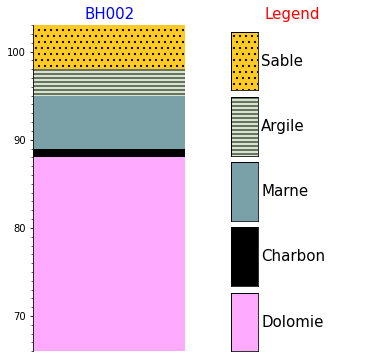

In [28]:
p.boreholes_3d[bh].log_plot()

In [29]:
p.boreholes_3d[bh].cmap

In [30]:
sargs = dict(title='test', title_font_size=30, label_font_size=12, n_labels=0,
             fmt="%.2f", font_family="arial", color='k',interactive=True, 
             vertical=True, italic=True, shadow=False,)

In [38]:
bh=1
p.boreholes_3d[bh].plot3d(show_legend=False, scalar_bar_args=sargs)

{0.4: 'sable', 1.2000000000000002: 'argile', 2.0: 'marne', 2.8000000000000003: 'charbon', 3.6: 'dolomie'}
5


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Plot with another attribute

In [32]:
p.update_legend_cmap(repr_attribute='pollutant')[1] #legend=lithology_memoris, update_legend=False)[0]

KeyError: 0

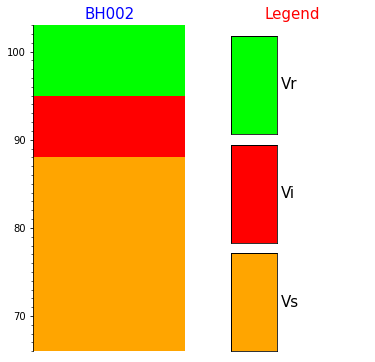

In [36]:
p.boreholes_3d[bh].log_plot(repr_attribute='pollutant')#, repr_legend=pollutant_memoris)

In [37]:
p.boreholes_3d[bh].plot3d(repr_attribute='pollutant')#, repr_legend=pollutant_memoris, show_legend=True)

{0.3333333333333333: 'vr', 1.0: 'vi', 1.6666666666666665: 'vs'}
3


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Display project boreholes

In [35]:
p.plot3d(repr_attribute='pollutant', labels_size=15, bg_color=["royalblue", "aliceblue"], window_size=(1300, 1000))

Colormap computing ...


KeyError: 0

### Boreholes in 3D using X3D for interaction within the notebook